In [1]:
import os

base_dir = "/content/handwriting_mood_project"
dirs = [
    "model",
    "dataset/doodle_dataset_128",
    "app/static",
    "app/templates",
    "app/uploads",
    "messages"
]

for d in dirs:
    os.makedirs(os.path.join(base_dir, d), exist_ok=True)

print("✅ Project folders created successfully!")


✅ Project folders created successfully!


In [2]:
from google.colab import files
uploaded = files.upload()


Saving doodle_dataset_128.zip to doodle_dataset_128.zip


In [3]:
import zipfile

zip_path = "/content/doodle_dataset_128.zip"
extract_path = os.path.join(base_dir, "dataset/doodle_dataset_128")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted!")


✅ Dataset extracted!


In [4]:
import os

classes = os.listdir(extract_path)
print("📂 Mood Classes:", classes)


📂 Mood Classes: ['anxiety', 'stress', 'neutral']


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and batch settings
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Setup augmentation pipeline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)

# Base path to dataset
data_path = "/content/handwriting_mood_project/dataset/doodle_dataset_128"

# Training generator
train_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,923 (12.61 MB)

 Trainable params: 3,305,475 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Save the best model
checkpoint_path = "/content/handwriting_mood_project/model/best_model.h5"

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)
]

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.1648 - loss: 3.7488

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1722 - loss: 4.0324 - val_accuracy: 0.2778 - val_loss: 1.1260
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.4590 - loss: 2.6013

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 910ms/step - accuracy: 0.4589 - loss: 2.5789 - val_accuracy: 0.3889 - val_loss: 1.0662
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4099 - loss: 3.4238 - val_accuracy: 0.2778 - val_loss: 1.1159
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4715 - loss: 2.7257 - val_accuracy: 0.3333 - val_loss: 1.1231
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4639 - loss: 1.5899 - val_accuracy: 0.3333 - val_loss: 1.1362
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 834ms/step - accuracy: 0.5552 - loss: 2.1141 - val_accuracy: 0.3333 - val_loss: 1.1108
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4049 - loss: 3.8972 - val_accuracy: 0.3333 - val_loss: 1.1381


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


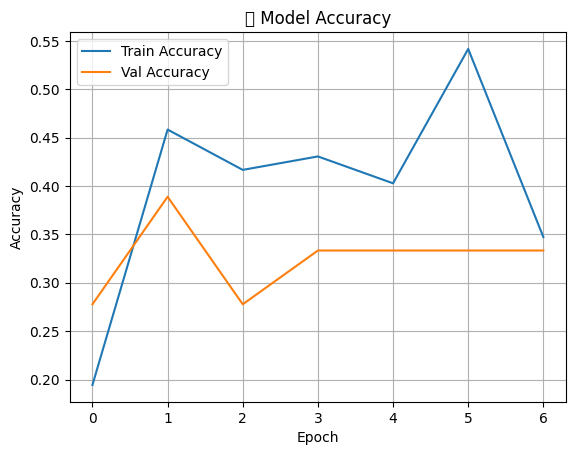

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


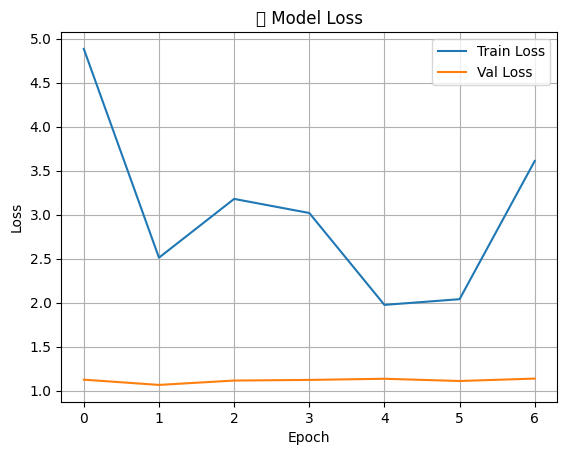

In [8]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


✅ Final Validation Accuracy: 22.22%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


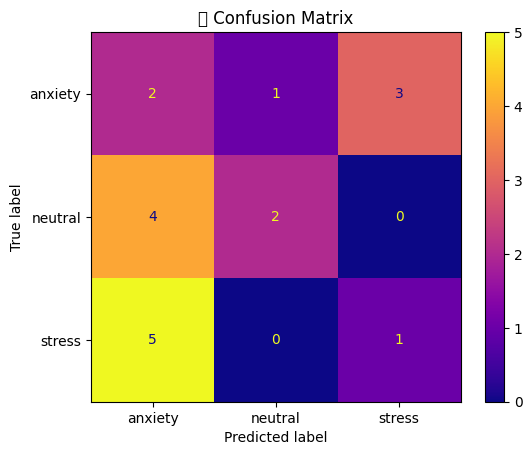


🧾 Classification Report:

              precision    recall  f1-score   support

     anxiety       0.18      0.33      0.24         6
     neutral       0.67      0.33      0.44         6
      stress       0.25      0.17      0.20         6

    accuracy                           0.28        18
   macro avg       0.37      0.28      0.29        18
weighted avg       0.37      0.28      0.29        18



In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluate the model
val_loss, val_acc = model.evaluate(val_gen, verbose=0)
print(f"✅ Final Validation Accuracy: {val_acc * 100:.2f}%")

# Predict on validation set
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_gen.classes
class_names = list(val_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='plasma')
plt.title("📊 Confusion Matrix")
plt.show()

# Classification report
print("\n🧾 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Found 72 images belonging to 3 classes.
Found 18 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.2836 - loss: 1.8704

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.2925 - loss: 1.8915 - val_accuracy: 0.3889 - val_loss: 1.5061
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.2806 - loss: 2.3000

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2833 - loss: 2.2396 - val_accuracy: 0.3333 - val_loss: 1.2371
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1889 - loss: 1.9329 - val_accuracy: 0.3333 - val_loss: 1.4309
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - accuracy: 0.3444 - loss: 1.6464 - val_accuracy: 0.3333 - val_loss: 1.4097
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 429ms/step - accuracy: 0.3728 - loss: 1.9220 - val_accuracy: 0.2778 - val_loss: 1.3662
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.3407 - loss: 1.6576

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 821ms/step - accuracy: 0.3424 - loss: 1.7005 - val_accuracy: 0.2778 - val_loss: 1.1764
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - accuracy: 0.4257 - loss: 1.5064 - val_accuracy: 0.2222 - val_loss: 1.3668
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - accuracy: 0.4023 - loss: 1.6540 - val_accuracy: 0.3889 - val_loss: 1.4336
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.3380 - loss: 1.7978

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3507 - loss: 1.7594 - val_accuracy: 0.5000 - val_loss: 1.1305
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 530ms/step - accuracy: 0.3958 - loss: 2.0743 - val_accuracy: 0.2222 - val_loss: 1.2495
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.2998 - loss: 1.9411 - val_accuracy: 0.1667 - val_loss: 1.3342
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 818ms/step - accuracy: 0.4639 - loss: 1.6952 - val_accuracy: 0.1667 - val_loss: 1.2267
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.4596 - loss: 1.4712 - val_accuracy: 0.1667 - val_loss: 1.2570
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 642ms/step - accuracy: 0.4507 - loss: 1.5748 - val_accuracy: 0.4444 - val_loss: 1.1440


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


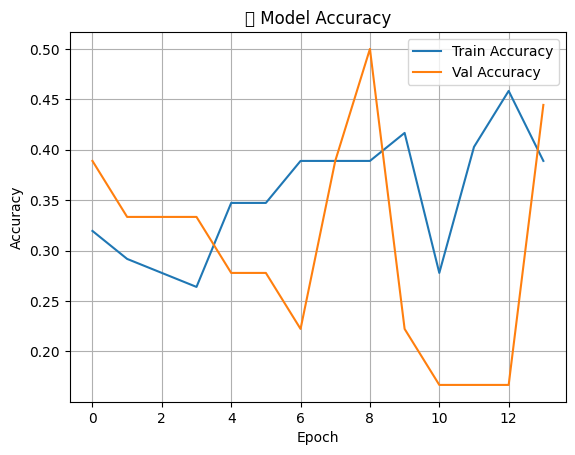

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


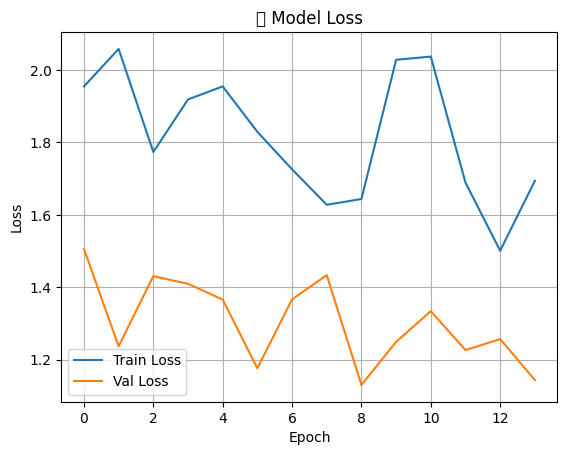

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Image and batch settings
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Setup augmentation pipeline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split dataset into training and validation
)

# Base path to dataset
data_path = "/content/handwriting_mood_project/dataset/doodle_dataset_128"

# Training generator
train_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Base pre-trained model (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze the base layers

# Model Architecture
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')  # Multi-class classification output
])

# Compile the Model
model.compile(
    loss='categorical_crossentropy',  # Using categorical crossentropy for multi-class
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

# Define callbacks
checkpoint_path = "/content/handwriting_mood_project/model/best_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=callbacks
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


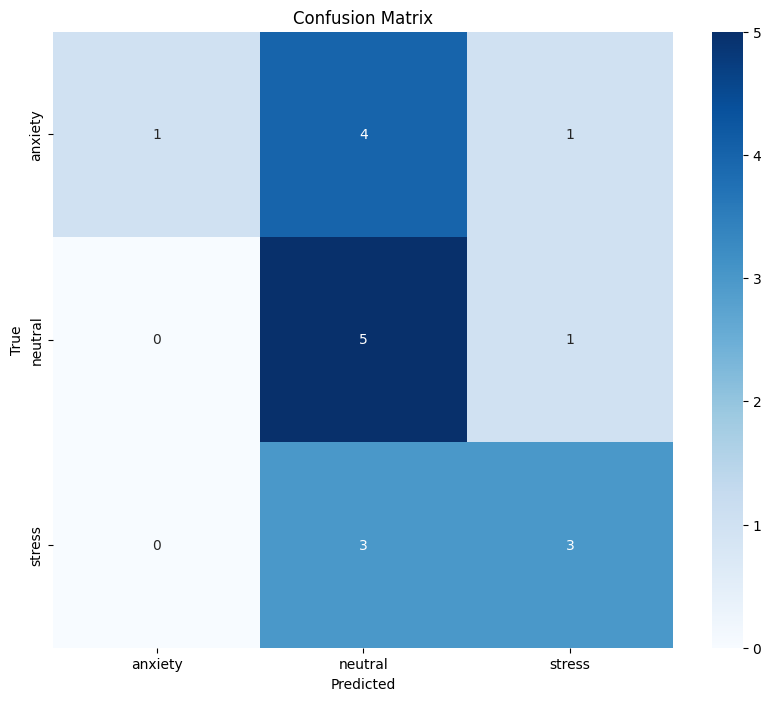

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the best model saved during training
model = load_model('/content/handwriting_mood_project/model/best_model.h5')

# Get the true labels and predictions
true_labels = val_gen.classes  # True labels of the validation set
predictions = model.predict(val_gen)  # Predicting on the validation set

# Get the class indices (map them to the class labels)
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class indices

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [13]:
# Calculate accuracy from confusion matrix
accuracy = np.trace(cm) / np.sum(cm)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 50.00%


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.2870 - loss: 1.7130

3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3056 - loss: 1.6932 - val_accuracy: 0.4444 - val_loss: 1.3021
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step - accuracy: 0.4108 - loss: 1.3291 - val_accuracy: 0.3333 - val_loss: 1.5019
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step - accuracy: 0.3524 - loss: 1.4091 - val_accuracy: 0.2778 - val_loss: 1.4464
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 475ms/step - accuracy: 0.4123 - loss: 1.3552 - val_accuracy: 0.3333 - val_loss: 1.6822
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3819 - loss: 1.2090 - val_accuracy: 0.2222 - val_loss: 1.6573
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 954ms/step - accuracy: 0.4965 - loss: 1.2212 - val_accuracy: 0.4444 - val_loss: 1.6512
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


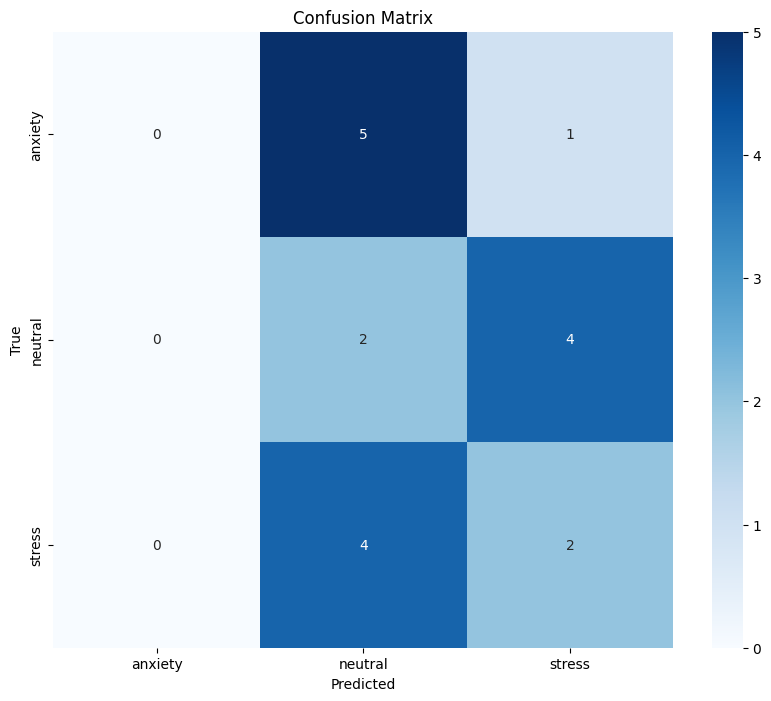

Accuracy: 22.22%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


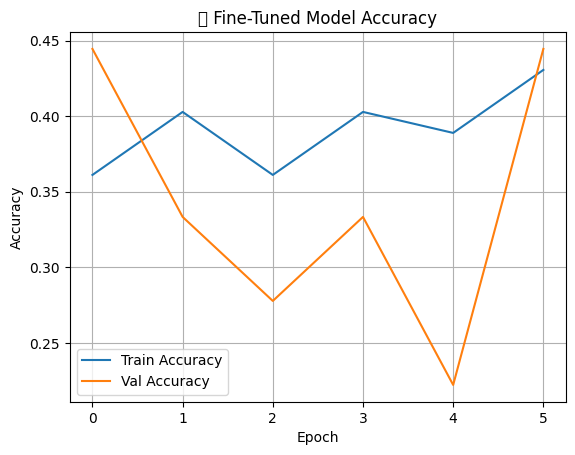

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


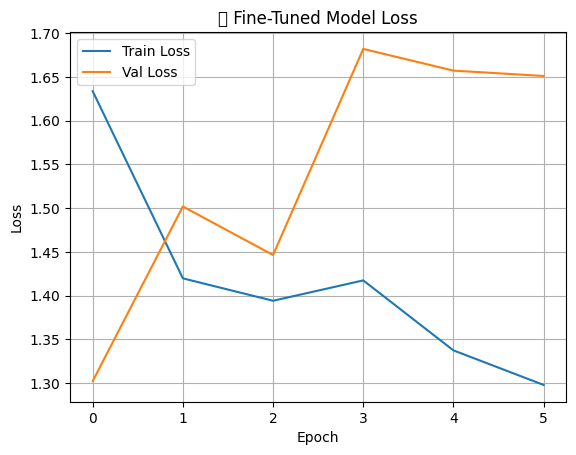

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

# Load the best model saved during training
model = load_model('/content/handwriting_mood_project/model/best_model.h5')

# Unfreeze the last few layers of MobileNetV2 for fine-tuning
base_model = model.layers[0]  # Access the base model (MobileNetV2)
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers (can adjust this)
    layer.trainable = True

# Re-compile the model with a higher learning rate for fine-tuning
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),  # Fine-tune with a lower learning rate
    metrics=['accuracy']
)

# Train the model again, fine-tuning the base model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint("/content/handwriting_mood_project/model/best_model_finetuned.h5", monitor='val_loss', save_best_only=True)
    ]
)

# Evaluate the model after fine-tuning
# Get the true labels and predictions
true_labels = val_gen.classes  # True labels of the validation set
predictions = model.predict(val_gen)  # Predicting on the validation set

# Get the class indices (map them to the class labels)
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class indices

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate accuracy from confusion matrix
accuracy = np.trace(cm) / np.sum(cm)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot training/validation accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Fine-Tuned Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Fine-Tuned Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,397 (11.12 MB)

 Trainable params: 657,411 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


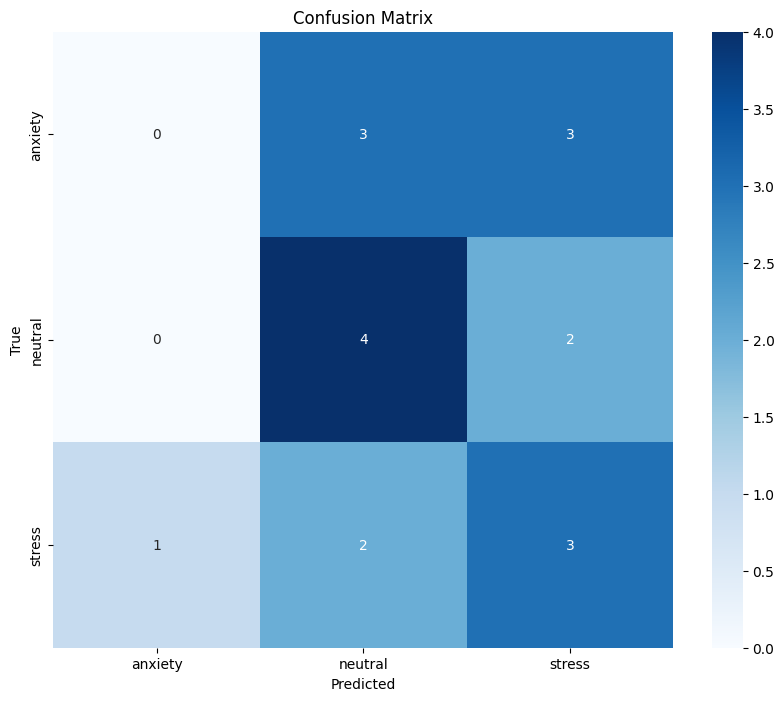

Accuracy: 38.89%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


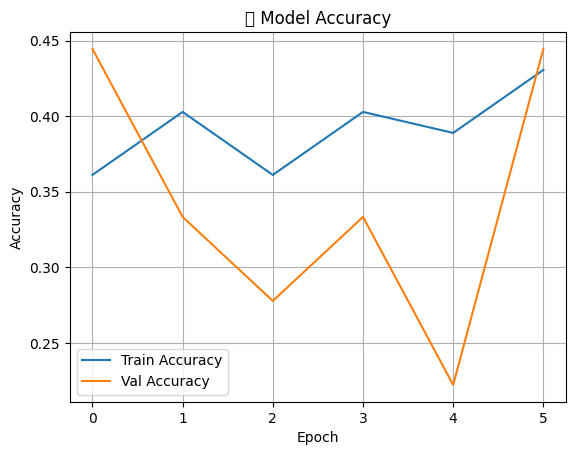

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


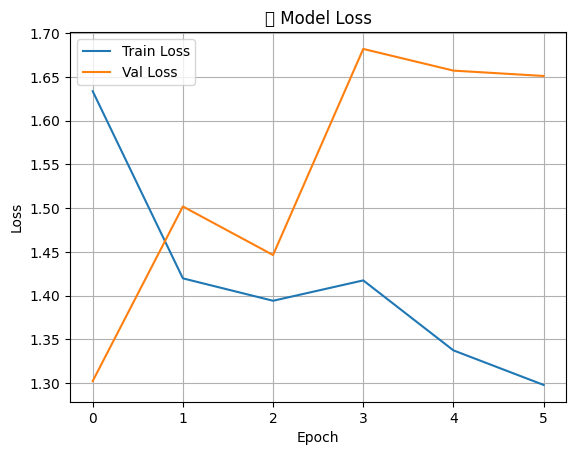

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the best model saved during training (or after fine-tuning)
model = load_model('/content/handwriting_mood_project/model/best_model.h5')

# Show model summary (layer types, output shapes, etc.)
model.summary()

# Get the true labels and predictions from the validation set
true_labels = val_gen.classes  # True labels of the validation set
predictions = model.predict(val_gen)  # Predicting on the validation set

# Convert the predictions into class indices
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class indices

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate accuracy from confusion matrix
accuracy = np.trace(cm) / np.sum(cm)  # Trace of the matrix is the sum of correct predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, plot training/validation accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,397 (11.12 MB)

 Trainable params: 657,411 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


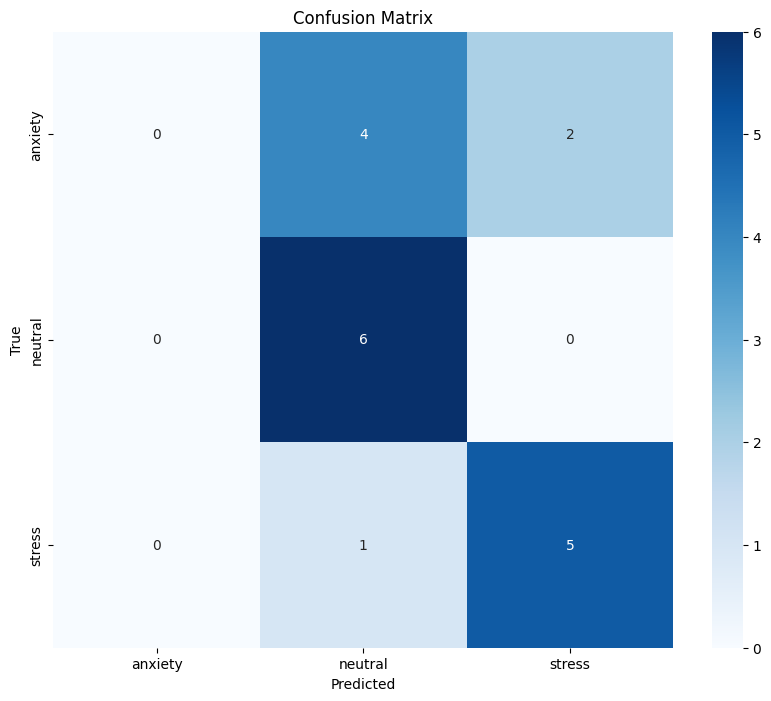

Accuracy: 61.11%
Classification Report:
              precision    recall  f1-score   support

     anxiety       0.00      0.00      0.00         6
     neutral       0.55      1.00      0.71         6
      stress       0.71      0.83      0.77         6

    accuracy                           0.61        18
   macro avg       0.42      0.61      0.49        18
weighted avg       0.42      0.61      0.49        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

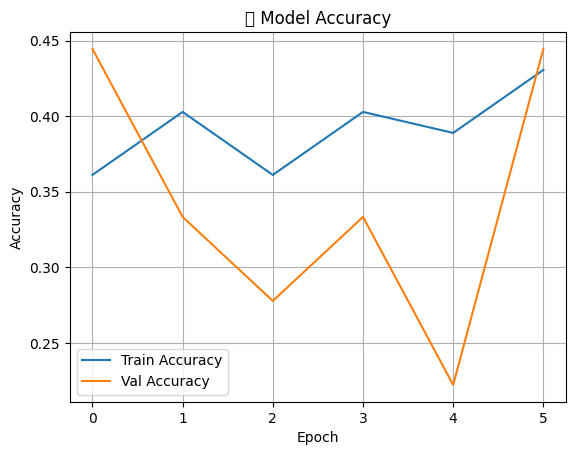

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


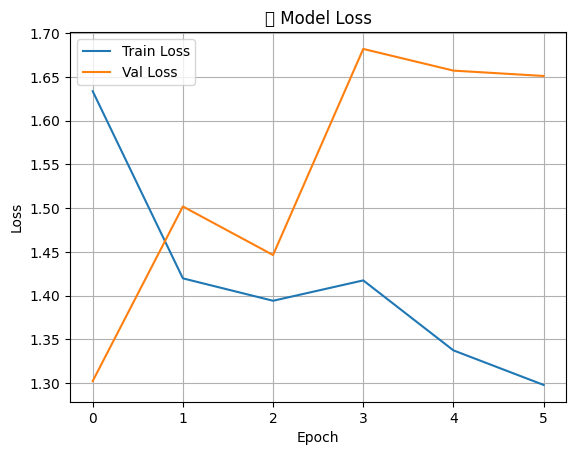

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

# Load the best model saved during training (or after fine-tuning)
model = load_model('/content/handwriting_mood_project/model/best_model.h5')

# Show model summary (layer types, output shapes, etc.)
model.summary()

# Get the true labels and predictions from the validation set
true_labels = val_gen.classes  # True labels of the validation set
predictions = model.predict(val_gen)  # Predicting on the validation set

# Convert the predictions into class indices
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class indices

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate and print accuracy from confusion matrix
accuracy = np.trace(cm) / np.sum(cm)  # Trace of the matrix is the sum of correct predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

# Get the classification report (Precision, Recall, F1-score)
report = classification_report(true_labels, predicted_classes, target_names=val_gen.class_indices)
print("Classification Report:")
print(report)

# Optionally, plot training/validation accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 72 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,048,003 (11.63 MB)

 Trainable params: 2,650,435 (10.11 MB)

 Non-trainable params: 397,568 (1.52 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.2807 - loss: 1.6058

3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.2765 - loss: 1.6145 - val_accuracy: 0.3333 - val_loss: 1.4488 - learning_rate: 1.0000e-04
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4792 - loss: 1.4377 - val_accuracy: 0.3333 - val_loss: 1.5294 - learning_rate: 1.0000e-04
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.3470 - loss: 1.4211

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 906ms/step - accuracy: 0.3470 - loss: 1.4146 - val_accuracy: 0.2778 - val_loss: 1.3240 - learning_rate: 1.0000e-04
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2833 - loss: 1.7195 - val_accuracy: 0.3333 - val_loss: 1.3956 - learning_rate: 1.0000e-04
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.4278 - loss: 1.3371

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 894ms/step - accuracy: 0.4042 - loss: 1.4123 - val_accuracy: 0.3333 - val_loss: 1.3015 - learning_rate: 1.0000e-04
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 688ms/step - accuracy: 0.2894 - loss: 1.4494 - val_accuracy: 0.3333 - val_loss: 1.3372 - learning_rate: 1.0000e-04
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.3806 - loss: 1.3257

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 980ms/step - accuracy: 0.3896 - loss: 1.3127 - val_accuracy: 0.2778 - val_loss: 1.2419 - learning_rate: 1.0000e-04
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 621ms/step - accuracy: 0.3702 - loss: 1.4384 - val_accuracy: 0.3333 - val_loss: 1.4642 - learning_rate: 1.0000e-04
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 615ms/step - accuracy: 0.3494 - loss: 1.4521 - val_accuracy: 0.2778 - val_loss: 1.4230 - learning_rate: 1.0000e-04
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.4197 - loss: 1.6265

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 869ms/step - accuracy: 0.4155 - loss: 1.6118 - val_accuracy: 0.3889 - val_loss: 1.1421 - learning_rate: 1.0000e-04
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 822ms/step - accuracy: 0.3269 - loss: 1.6688 - val_accuracy: 0.2778 - val_loss: 1.3527 - learning_rate: 1.0000e-04
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4757 - loss: 1.1391 - val_accuracy: 0.3889 - val_loss: 1.3478 - learning_rate: 1.0000e-04
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 593ms/step - accuracy: 0.3594 - loss: 1.5204 - val_accuracy: 0.2778 - val_loss: 1.1622 - learning_rate: 1.0000e-04
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.2541 - loss: 1.4936

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 842ms/step - accuracy: 0.2600 - loss: 1.4894 - val_accuracy: 0.3889 - val_loss: 1.0997 - learning_rate: 1.0000e-05
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 946ms/step - accuracy: 0.4979 - loss: 1.1902 - val_accuracy: 0.2778 - val_loss: 1.3191 - learning_rate: 1.0000e-05
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 796ms/step - accuracy: 0.5009 - loss: 1.2572 - val_accuracy: 0.2778 - val_loss: 1.2824 - learning_rate: 1.0000e-05
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 751ms/step - accuracy: 0.5078 - loss: 1.2083 - val_accuracy: 0.4444 - val_loss: 1.1423 - learning_rate: 1.0000e-05
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 676ms/step - accuracy: 0.4863 - loss: 1.2373 - val_accuracy: 0.1111 - val_loss: 1.4232 - learning_rate: 1.0000e-06
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 610ms/step - accuracy: 0.3819 - loss: 1.4771 - val_accuracy: 0.1667 - val_loss: 1.2419 - learning_rate: 1.0000e-06


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


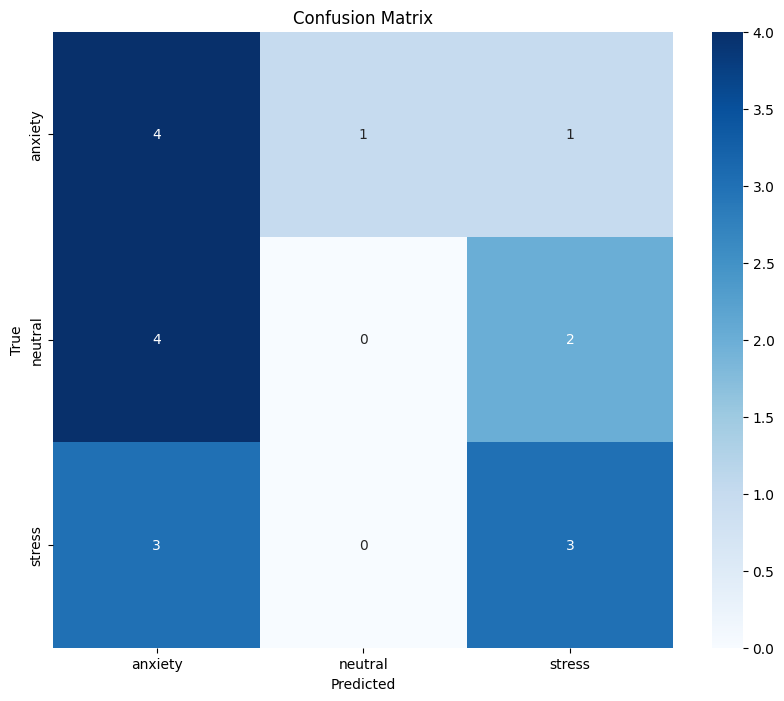

Accuracy: 38.89%
Classification Report:
              precision    recall  f1-score   support

     anxiety       0.36      0.67      0.47         6
     neutral       0.00      0.00      0.00         6
      stress       0.50      0.50      0.50         6

    accuracy                           0.39        18
   macro avg       0.29      0.39      0.32        18
weighted avg       0.29      0.39      0.32        18



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


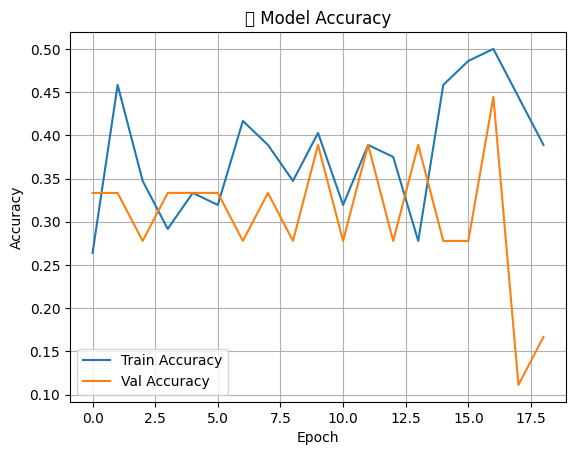

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


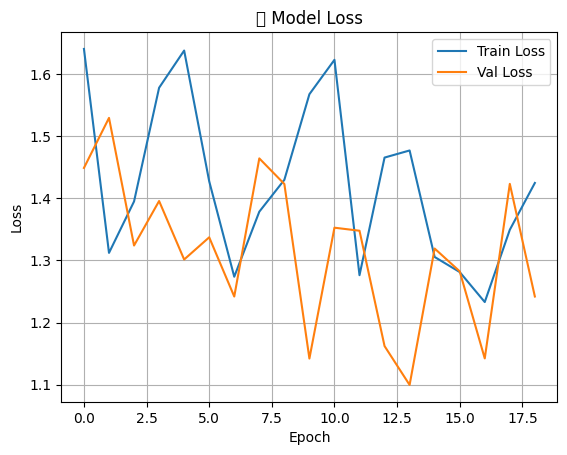

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and batch settings
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Setup augmentation pipeline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Add brightness variation
    validation_split=0.2
)

# Base path to dataset
data_path = "/content/handwriting_mood_project/dataset/doodle_dataset_128"

# Create the training and validation generators
train_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Define the number of classes (output categories)
num_classes = len(train_gen.class_indices)

# Load the pre-trained MobileNetV2 model as a base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[:100]:  # Unfreeze some of the layers
    layer.trainable = False

# Define the model architecture
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(512, activation='relu'),
    BatchNormalization(),  # Added batch normalization
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model with a lower learning rate and Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary (layer types, output shapes, number of parameters)
model.summary()

# Define callbacks (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau)
checkpoint_path = "/content/handwriting_mood_project/model/best_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)  # Reduce learning rate on plateau
]

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=callbacks
)

# Load the best model saved during training
model = load_model(checkpoint_path)

# Get the true labels and predictions from the validation set
true_labels = val_gen.classes  # True labels of the validation set
predictions = model.predict(val_gen)  # Predicting on the validation set

# Convert the predictions into class indices
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class indices

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate and print accuracy from confusion matrix
accuracy = np.trace(cm) / np.sum(cm)  # Trace of the matrix is the sum of correct predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

# Get the classification report (Precision, Recall, F1-score)
report = classification_report(true_labels, predicted_classes, target_names=val_gen.class_indices)
print("Classification Report:")
print(report)

# Optionally, plot training/validation accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 72 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,395 (11.12 MB)

 Trainable params: 657,411 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.1787 - loss: 1.5760

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.1931 - loss: 1.5781 - val_accuracy: 0.3889 - val_loss: 1.2046 - learning_rate: 1.0000e-04
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.2426 - loss: 1.5094

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 838ms/step - accuracy: 0.2514 - loss: 1.5237 - val_accuracy: 0.3333 - val_loss: 1.1086 - learning_rate: 1.0000e-04
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 0.3494 - loss: 1.3982 - val_accuracy: 0.2778 - val_loss: 1.1597 - learning_rate: 1.0000e-04
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.3600 - loss: 1.4587

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 647ms/step - accuracy: 0.3602 - loss: 1.4536 - val_accuracy: 0.4444 - val_loss: 1.0677 - learning_rate: 1.0000e-04
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.3731 - loss: 1.5119

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 834ms/step - accuracy: 0.3597 - loss: 1.5168 - val_accuracy: 0.4444 - val_loss: 1.0577 - learning_rate: 1.0000e-04
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 726ms/step - accuracy: 0.2771 - loss: 1.3742 - val_accuracy: 0.4444 - val_loss: 1.0861 - learning_rate: 1.0000e-04
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 884ms/step - accuracy: 0.3229 - loss: 1.4449 - val_accuracy: 0.2222 - val_loss: 1.2034 - learning_rate: 1.0000e-04
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - accuracy: 0.4340 - loss: 1.2888 - val_accuracy: 0.3889 - val_loss: 1.3405 - learning_rate: 1.0000e-04
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - accuracy: 0.2543 - loss: 1.6024 - val_accuracy: 0.3889 - val_loss: 1.1434 - learning_rate: 1.0000e-05
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 860ms/step - accuracy: 0.3944 - loss: 1.3674 - val_accuracy: 0.2778 - val_loss: 1.2290 - learning_rate: 1.0000e-05


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


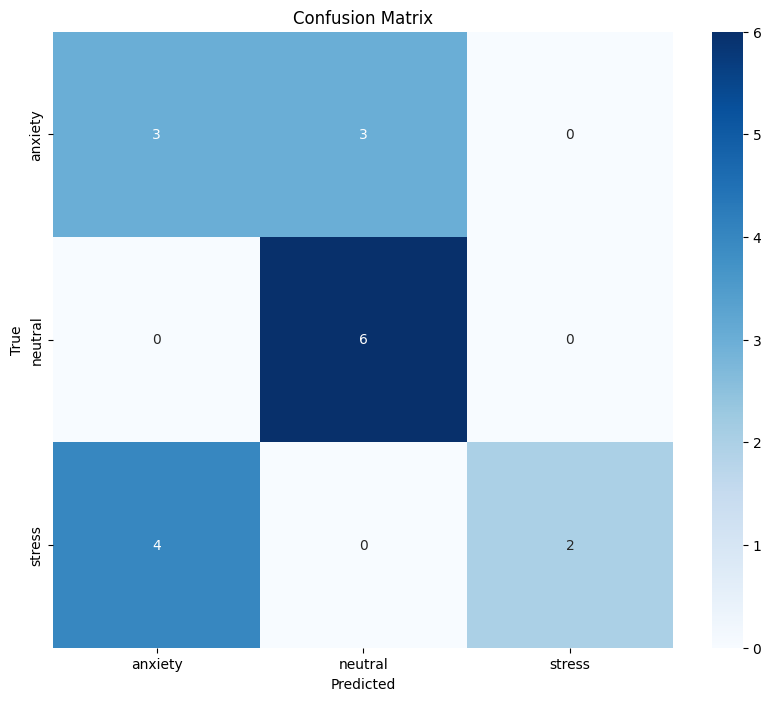

Accuracy: 61.11%
Classification Report:
              precision    recall  f1-score   support

     anxiety       0.43      0.50      0.46         6
     neutral       0.67      1.00      0.80         6
      stress       1.00      0.33      0.50         6

    accuracy                           0.61        18
   macro avg       0.70      0.61      0.59        18
weighted avg       0.70      0.61      0.59        18



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


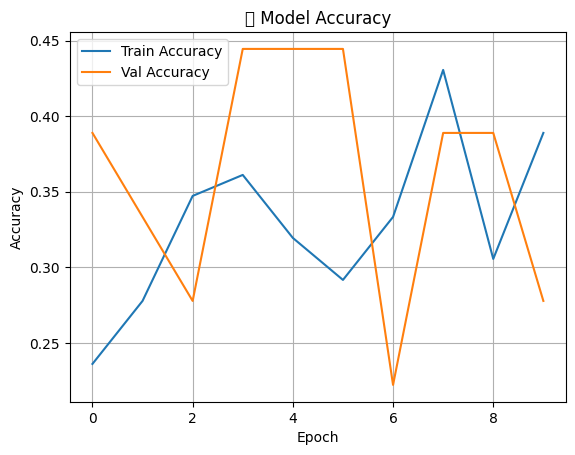

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


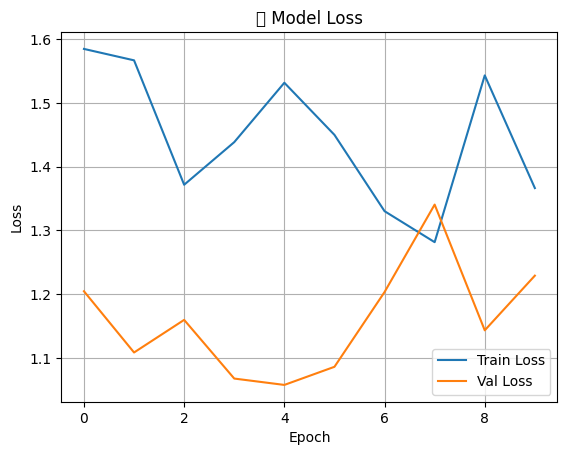

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and batch settings
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Setup augmentation pipeline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Added brightness variation
    validation_split=0.2
)

# Base path to dataset
data_path = "/content/handwriting_mood_project/dataset/doodle_dataset_128"

# Create the training and validation generators
train_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Define the number of classes (output categories)
num_classes = len(train_gen.class_indices)

# Load the pre-trained MobileNetV2 model as a base without fine-tuning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze all layers in the base model
base_model.trainable = False

# Define the model architecture
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Pooling layer for better representation
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model with Adam optimizer and a standard learning rate
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary (layer types, output shapes, number of parameters)
model.summary()

# Define callbacks (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau)
checkpoint_path = "/content/handwriting_mood_project/model/best_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)  # Reduce learning rate on plateau
]

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=callbacks
)

# Load the best model saved during training
model = load_model(checkpoint_path)

# Get the true labels and predictions from the validation set
true_labels = val_gen.classes  # True labels of the validation set
predictions = model.predict(val_gen)  # Predicting on the validation set

# Convert the predictions into class indices
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class indices

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate and print accuracy from confusion matrix
accuracy = np.trace(cm) / np.sum(cm)  # Trace of the matrix is the sum of correct predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

# Get the classification report (Precision, Recall, F1-score)
report = classification_report(true_labels, predicted_classes, target_names=val_gen.class_indices)
print("Classification Report:")
print(report)

# Optionally, plot training/validation accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import os
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import random

# Base path to the dataset
dataset_path = "/content/handwriting_mood_project/dataset/doodle_dataset_128"
target_count = 500

# Augmentation function
def augment_image(img):
    if random.random() > 0.5:
        img = ImageOps.mirror(img)
    if random.random() > 0.5:
        img = ImageOps.flip(img)
    angle = random.randint(-25, 25)
    img = img.rotate(angle)
    if random.random() > 0.5:
        width, height = img.size
        zoom_factor = random.uniform(0.8, 1.0)
        new_width = int(width * zoom_factor)
        new_height = int(height * zoom_factor)
        left = random.randint(0, width - new_width)
        top = random.randint(0, height - new_height)
        img = img.crop((left, top, left + new_width, top + new_height))
        img = img.resize((width, height))
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(random.uniform(0.7, 1.3))
    if random.random() > 0.5:
        np_img = np.array(img)
        noise = np.random.randint(0, 30, np_img.shape, dtype='uint8')
        np_img = np.clip(np_img + noise, 0, 255).astype('uint8')
        img = Image.fromarray(np_img)
    return img

# Process each class folder
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    print(f"🔄 Augmenting class: {class_name}")

    # Load original images
    image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    images = [Image.open(os.path.join(class_dir, f)).convert("RGB") for f in image_files]

    # Copy originals with a consistent naming (optional)
    for idx, img in enumerate(images):
        img.save(os.path.join(class_dir, f"orig_{idx:03}.jpg"))

    # Generate augmented images
    current_count = len(images)
    while current_count < target_count:
        img = random.choice(images)
        aug_img = augment_image(img)
        aug_img.save(os.path.join(class_dir, f"aug_{current_count:03}.jpg"))
        current_count += 1

    print(f"✅ {class_name} done: {current_count} images")

print("🎉 All classes processed and augmented to 500 images.")


🔄 Augmenting class: anxiety
✅ anxiety done: 500 images
🔄 Augmenting class: stress
✅ stress done: 500 images
🔄 Augmenting class: neutral
✅ neutral done: 500 images
🎉 All classes processed and augmented to 500 images.


Found 1272 images belonging to 3 classes.
Found 318 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 990ms/step - accuracy: 0.3710 - loss: 1.5243

40/40 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3708 - loss: 1.5242 - val_accuracy: 0.3428 - val_loss: 1.2177 - learning_rate: 1.0000e-04
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3555 - loss: 1.5564 - val_accuracy: 0.3774 - val_loss: 1.2428 - learning_rate: 1.0000e-04
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3917 - loss: 1.4926 - val_accuracy: 0.3679 - val_loss: 1.3066 - learning_rate: 1.0000e-04
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4389 - loss: 1.3538 - val_accuracy: 0.3711 - val_loss: 1.4503 - learning_rate: 1.0000e-04
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4458 - loss: 1.3627 - val_accuracy: 0.3774 - val_loss: 1.4202 - learning_rate: 2.0000e-05
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4009 - loss: 1.3680 - val_accuracy: 0.3553 - val_loss: 1.4454 - learning_rate: 2.0000e-05
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4451 - loss: 1.3204 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 790ms/step


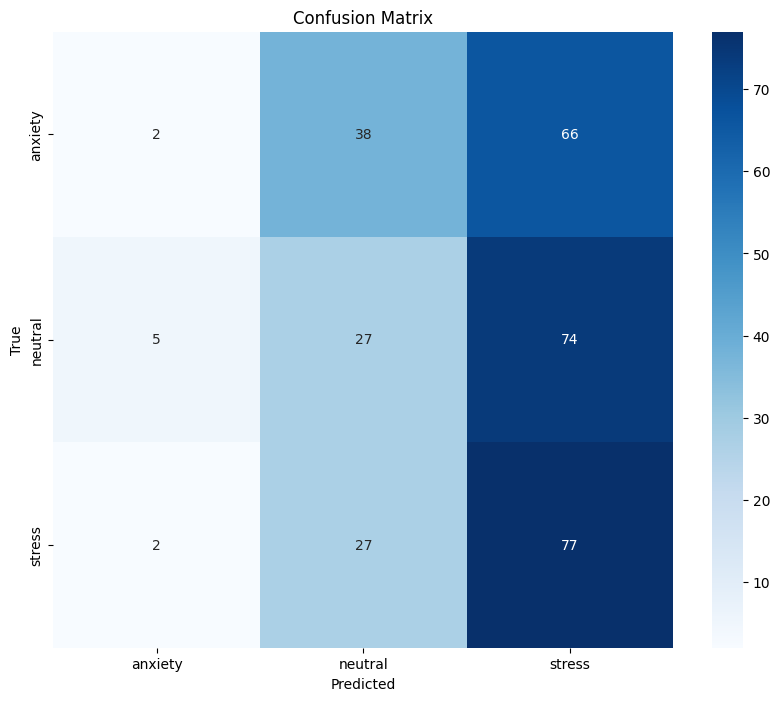

✅ Accuracy: 33.33%
Classification Report:
              precision    recall  f1-score   support

     anxiety       0.22      0.02      0.03       106
     neutral       0.29      0.25      0.27       106
      stress       0.35      0.73      0.48       106

    accuracy                           0.33       318
   macro avg       0.29      0.33      0.26       318
weighted avg       0.29      0.33      0.26       318



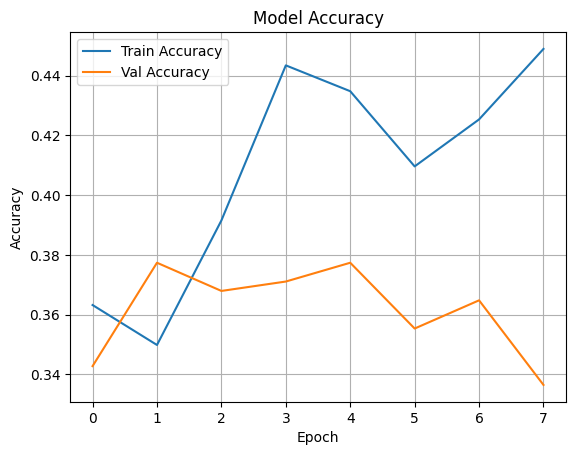

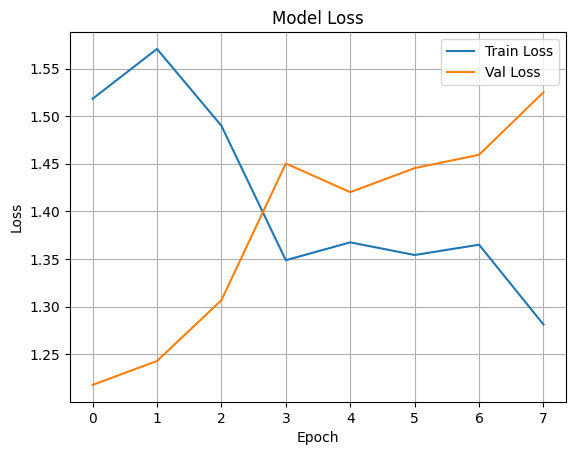

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image settings
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Stronger Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    validation_split=0.2
)

# Dataset path
data_path = "/content/handwriting_mood_project/dataset/doodle_dataset_128"

# Train and validation generators
train_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_gen.class_indices)

# Load MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Unfreeze more layers for better learning
for layer in base_model.layers[:80]:
    layer.trainable = False
for layer in base_model.layers[80:]:
    layer.trainable = True

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.4),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint_path = "/content/handwriting_mood_project/model/best_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=40,
    callbacks=callbacks
)

# Load best model
model = load_model(checkpoint_path)

# Evaluation
true_labels = val_gen.classes
predictions = model.predict(val_gen)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_gen.class_indices,
            yticklabels=val_gen.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy
accuracy = np.trace(cm) / np.sum(cm)
print(f'✅ Accuracy: {accuracy * 100:.2f}%')

# Classification report
report = classification_report(true_labels, predicted_classes, target_names=val_gen.class_indices)
print("Classification Report:")
print(report)

# Plot training curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
import os
from collections import Counter

labels_count = Counter(train_gen.classes)
print("🔍 Class distribution in training set:", labels_count)


🔍 Class distribution in training set: Counter({np.int32(0): 424, np.int32(1): 424, np.int32(2): 424})


In [30]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.85, 1.15],
    validation_split=0.2
)


In [31]:
for layer in base_model.layers:
    if not isinstance(layer, BatchNormalization):
        layer.trainable = True


In [32]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),


(<keras.src.callbacks.early_stopping.EarlyStopping at 0x7d9b27ca4c50>,)

In [34]:
from tensorflow.keras.regularizers import l2

Dense(512, activation='relu', kernel_regularizer=l2(1e-4))


<Dense name=dense_17, built=False>

Found 1272 images belonging to 3 classes.
Found 318 images belonging to 3 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,844,710 (18.48 MB)

 Trainable params: 4,631,903 (17.67 MB)

 Non-trainable params: 212,807 (831.28 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3468 - loss: 1.6594

40/40 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.3469 - loss: 1.6592 - val_accuracy: 0.3333 - val_loss: 1.1088 - learning_rate: 1.0000e-04
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3604 - loss: 1.5861 - val_accuracy: 0.3333 - val_loss: 1.1374 - learning_rate: 1.0000e-04
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.3294 - loss: 1.7123 - val_accuracy: 0.3333 - val_loss: 1.1510 - learning_rate: 1.0000e-04
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.3546 - loss: 1.4969 - val_accuracy: 0.3333 - val_loss: 1.2461 - learning_rate: 1.0000e-04
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.3409 - loss: 1.5612 - val_accuracy: 0.3333 - val_loss: 1.2899 - learning_rate: 3.0000e-05
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.3255 - loss: 1.5980 - val_accuracy: 0.3333 - val_loss: 1.3593 - learning_rate: 3.0000e-05
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.3409 - loss: 1.6082 - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 994ms/step


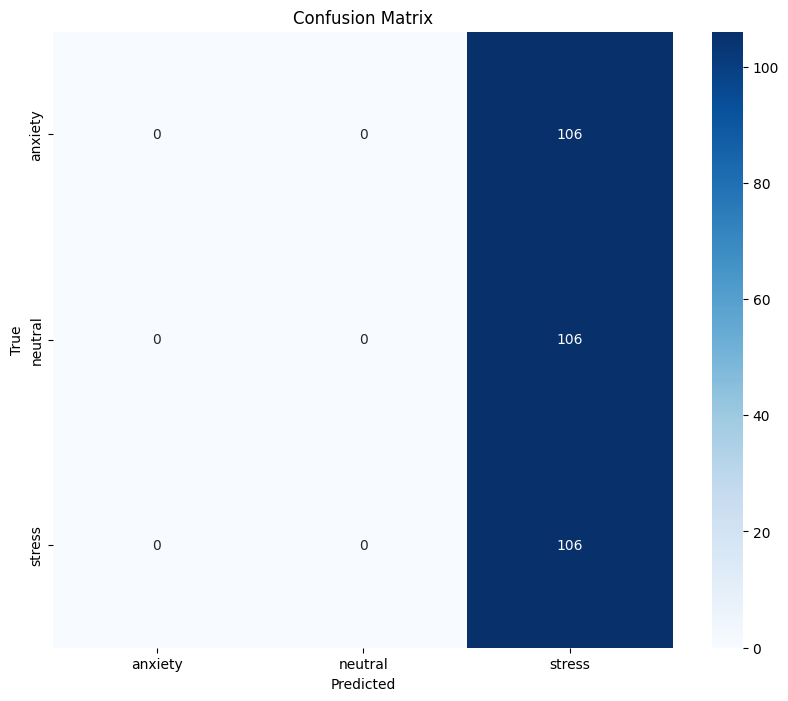

✅ Accuracy: 33.33%
Classification Report:
              precision    recall  f1-score   support

     anxiety       0.00      0.00      0.00       106
     neutral       0.00      0.00      0.00       106
      stress       0.33      1.00      0.50       106

    accuracy                           0.33       318
   macro avg       0.11      0.33      0.17       318
weighted avg       0.11      0.33      0.17       318



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


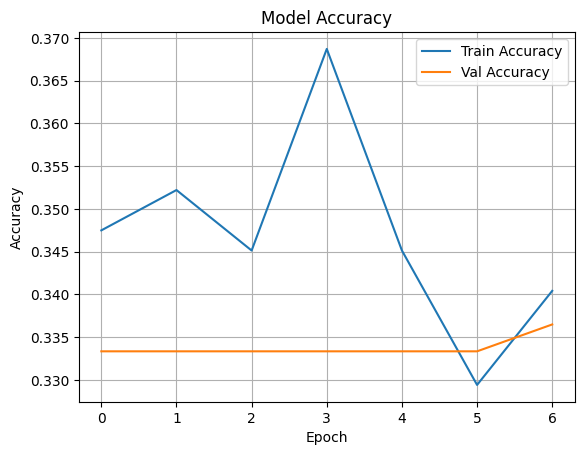

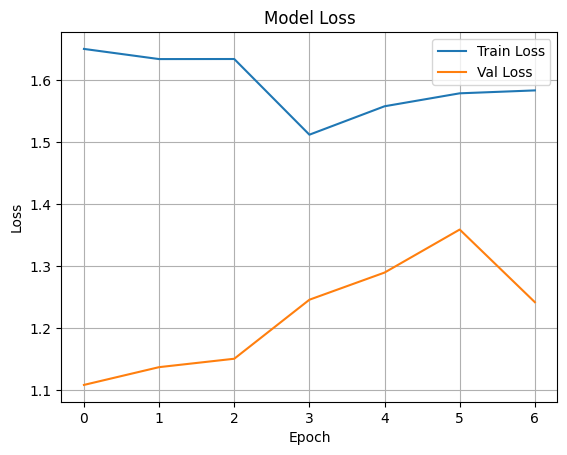

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and dataset settings
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
DATA_PATH = "/content/handwriting_mood_project/dataset/doodle_dataset_128"
CHECKPOINT_PATH = "/content/handwriting_mood_project/model/best_model_effnet.h5"

# Augmentation strategy
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Train/validation generators
train_gen = datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_gen.class_indices)

# Load EfficientNetB0 base model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
for layer in base_model.layers[:100]:
    layer.trainable = False
for layer in base_model.layers[100:]:
    layer.trainable = True

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ModelCheckpoint(CHECKPOINT_PATH, monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
]

# Train
history = model.fit(train_gen, validation_data=val_gen, epochs=40, callbacks=callbacks)

# Load best model
model = load_model(CHECKPOINT_PATH)

# Evaluation
true_labels = val_gen.classes
predictions = model.predict(val_gen)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_gen.class_indices,
            yticklabels=val_gen.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy
accuracy = np.trace(cm) / np.sum(cm)
print(f'✅ Accuracy: {accuracy * 100:.2f}%')

# Classification report
report = classification_report(true_labels, predicted_classes, target_names=val_gen.class_indices)
print("Classification Report:")
print(report)

# Accuracy & loss plots
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
